# Move Dialogue: Base Task

## Imports

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from collections import Counter
import pandas as pd
import nltk
from nltk import sent_tokenize, word_tokenize
from nltk.stem import WordNetLemmatizer
from nltk.stem import PorterStemmer
nltk.download('punkt')
nltk.download('universal_tagset')
nltk.download('averaged_perceptron_tagger')
nltk.download('wordnet')

[nltk_data] Downloading package punkt to
[nltk_data]     /Users/nicoespinosadice/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package universal_tagset to
[nltk_data]     /Users/nicoespinosadice/nltk_data...
[nltk_data]   Package universal_tagset is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /Users/nicoespinosadice/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/nicoespinosadice/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

## Importing Dataset

Source for how to import data:  
https://www.kaggle.com/shashankasubrahmanya/preprocessing-cornell-movie-dialogue-corpus

In [2]:
movie_lines_features = ["LineID", "Character", "Movie", "Name", "Line"]


In [3]:
movie_lines = pd.read_csv("data/movie_lines.txt", sep = "\+\+\+\$\+\+\+", engine = "python", encoding='ISO-8859-1', index_col = False, names = movie_lines_features)


## Data Cleaning

In [4]:
movie_lines = movie_lines.sample(frac=0.01)

In [5]:
movie_lines.head()

,LineID,Character,Movie,Name,Line
128469,L47095,u3729,m246,DR. DREYFUSS,"But you're not out of the woods yet, Baxter -..."
97565,L533370,u2886,m190,GENEVA MAN,He is a prisoner of war until you can prove s...
243286,L460068,u7220,m487,BUDDY,"Shut up, Doll. I'll cut your guts"
37991,L251413,u1178,m77,MRS. ROBINSON,"Listen to me very carefully, Benjamin. You ar..."
42563,L270513,u1272,m84,HAROLD,Would you like a cigarette?


In [6]:
# Strip the space from "LineID" for further usage and change the datatype of "Line"
movie_lines["LineID"] = movie_lines["LineID"].apply(str.strip)
movie_lines["Line"] = movie_lines["Line"].apply(str)
movie_lines["Line"] = movie_lines["Line"].apply(str.lower)

In [7]:
movie_lines.head()

,LineID,Character,Movie,Name,Line
128469,L47095,u3729,m246,DR. DREYFUSS,"but you're not out of the woods yet, baxter -..."
97565,L533370,u2886,m190,GENEVA MAN,he is a prisoner of war until you can prove s...
243286,L460068,u7220,m487,BUDDY,"shut up, doll. i'll cut your guts"
37991,L251413,u1178,m77,MRS. ROBINSON,"listen to me very carefully, benjamin. you ar..."
42563,L270513,u1272,m84,HAROLD,would you like a cigarette?


In [8]:
# # Remove lines that do not contain he or she pronouns
# # Only include lines where ' he ' is in middle of sentence, surrounded by at least 1 space on either side
# movie_lines = movie_lines[movie_lines["Line"].str.contains('|'.join([' he ', ' she ']))]

In [9]:
movie_lines.head()

,LineID,Character,Movie,Name,Line
128469,L47095,u3729,m246,DR. DREYFUSS,"but you're not out of the woods yet, baxter -..."
97565,L533370,u2886,m190,GENEVA MAN,he is a prisoner of war until you can prove s...
243286,L460068,u7220,m487,BUDDY,"shut up, doll. i'll cut your guts"
37991,L251413,u1178,m77,MRS. ROBINSON,"listen to me very carefully, benjamin. you ar..."
42563,L270513,u1272,m84,HAROLD,would you like a cigarette?


### Tokenization and Segmentation

In [10]:
# Tokenize and segment
# Drop rows without pronouns

In [11]:
movie_lines["Segmented_Line"] = movie_lines["Line"].apply(sent_tokenize)

In [12]:
df = pd.DataFrame(columns=movie_lines.columns)

In [13]:
df.head()

,LineID,Character,Movie,Name,Line,Segmented_Line


In [14]:
for row in movie_lines.iterrows():
    for sentence in row[1]["Segmented_Line"]:
        line_id = row[1]["LineID"]
        character = row[1]["Character"]
        movie = row[1]["Movie"]
        name = row[1]["Name"]
        line = row[1]["Line"]
        segmented = sentence
        new_row = {"LineID":line_id, "Character": character,
                   "Movie":movie,"Name":name,"Line":line,
                   "Segmented_Line":segmented}
        df = df.append(new_row, ignore_index=True)

In [15]:
df.head()

,LineID,Character,Movie,Name,Line,Segmented_Line
0,L47095,u3729,m246,DR. DREYFUSS,"but you're not out of the woods yet, baxter -...","but you're not out of the woods yet, baxter -..."
1,L47095,u3729,m246,DR. DREYFUSS,"but you're not out of the woods yet, baxter -...",you know where i am if you need me.
2,L533370,u2886,m190,GENEVA MAN,he is a prisoner of war until you can prove s...,he is a prisoner of war until you can prove s...
3,L460068,u7220,m487,BUDDY,"shut up, doll. i'll cut your guts","shut up, doll."
4,L460068,u7220,m487,BUDDY,"shut up, doll. i'll cut your guts",i'll cut your guts


In [16]:
movie_lines = df

In [17]:
movie_lines.head()

,LineID,Character,Movie,Name,Line,Segmented_Line
0,L47095,u3729,m246,DR. DREYFUSS,"but you're not out of the woods yet, baxter -...","but you're not out of the woods yet, baxter -..."
1,L47095,u3729,m246,DR. DREYFUSS,"but you're not out of the woods yet, baxter -...",you know where i am if you need me.
2,L533370,u2886,m190,GENEVA MAN,he is a prisoner of war until you can prove s...,he is a prisoner of war until you can prove s...
3,L460068,u7220,m487,BUDDY,"shut up, doll. i'll cut your guts","shut up, doll."
4,L460068,u7220,m487,BUDDY,"shut up, doll. i'll cut your guts",i'll cut your guts


In [18]:
# def tokenize_sentence_list(sentence_list):
#     return [word_tokenize(sentence) for sentence in sentence_list]

In [19]:
movie_lines["Tokenized_Line"] = movie_lines["Segmented_Line"].apply(word_tokenize)


In [20]:
movie_lines.head()

,LineID,Character,Movie,Name,Line,Segmented_Line,Tokenized_Line
0,L47095,u3729,m246,DR. DREYFUSS,"but you're not out of the woods yet, baxter -...","but you're not out of the woods yet, baxter -...","[but, you, 're, not, out, of, the, woods, yet,..."
1,L47095,u3729,m246,DR. DREYFUSS,"but you're not out of the woods yet, baxter -...",you know where i am if you need me.,"[you, know, where, i, am, if, you, need, me, .]"
2,L533370,u2886,m190,GENEVA MAN,he is a prisoner of war until you can prove s...,he is a prisoner of war until you can prove s...,"[he, is, a, prisoner, of, war, until, you, can..."
3,L460068,u7220,m487,BUDDY,"shut up, doll. i'll cut your guts","shut up, doll.","[shut, up, ,, doll, .]"
4,L460068,u7220,m487,BUDDY,"shut up, doll. i'll cut your guts",i'll cut your guts,"[i, 'll, cut, your, guts]"


### Extracting Pronouns

In [21]:
def get_pronoun(tokenized_line):
    if "she" in tokenized_line:
        return "she"
    elif "he" in tokenized_line:
        return "he"
    else:
        return "none"

In [22]:
movie_lines["Pronoun"] = movie_lines["Tokenized_Line"].apply(get_pronoun)

In [23]:
movie_lines.head()

,LineID,Character,Movie,Name,Line,Segmented_Line,Tokenized_Line,Pronoun
0,L47095,u3729,m246,DR. DREYFUSS,"but you're not out of the woods yet, baxter -...","but you're not out of the woods yet, baxter -...","[but, you, 're, not, out, of, the, woods, yet,...",none
1,L47095,u3729,m246,DR. DREYFUSS,"but you're not out of the woods yet, baxter -...",you know where i am if you need me.,"[you, know, where, i, am, if, you, need, me, .]",none
2,L533370,u2886,m190,GENEVA MAN,he is a prisoner of war until you can prove s...,he is a prisoner of war until you can prove s...,"[he, is, a, prisoner, of, war, until, you, can...",he
3,L460068,u7220,m487,BUDDY,"shut up, doll. i'll cut your guts","shut up, doll.","[shut, up, ,, doll, .]",none
4,L460068,u7220,m487,BUDDY,"shut up, doll. i'll cut your guts",i'll cut your guts,"[i, 'll, cut, your, guts]",none


In [24]:
movie_lines = movie_lines.loc[movie_lines["Pronoun"] != "none"]

In [25]:
movie_lines.head()

,LineID,Character,Movie,Name,Line,Segmented_Line,Tokenized_Line,Pronoun
2,L533370,u2886,m190,GENEVA MAN,he is a prisoner of war until you can prove s...,he is a prisoner of war until you can prove s...,"[he, is, a, prisoner, of, war, until, you, can...",he
45,L47236,u3730,m246,FRAN,three. the last one was manager of a finance ...,"the last one was manager of a finance company,...","[the, last, one, was, manager, of, a, finance,...",he
59,L59168,u393,m24,DEBBIE,he still thinks i'm going with him. i'm going...,he still thinks i'm going with him.,"[he, still, thinks, i, 'm, going, with, him, .]",he
75,L106799,u4214,m281,VIOLET,you can't know for certain that he won't see ...,you can't know for certain that he won't see ...,"[you, ca, n't, know, for, certain, that, he, w...",he
104,L135380,u4522,m299,CAITLIN,"the story goes like this: he proposed, and i ...","the story goes like this: he proposed, and i ...","[the, story, goes, like, this, :, he, proposed...",he


In [26]:
movie_lines.describe()

,LineID,Character,Movie,Name,Line,Segmented_Line,Tokenized_Line,Pronoun
count,339,339,339,339,339,339,339,339
unique,278,268,224,248,278,339,339,2
top,L140852,u712,m564,GORDO,what are you? new? let me tell you how good t...,he is a prisoner of war until you can prove s...,"[he, is, a, prisoner, of, war, until, you, can...",he
freq,5,5,7,5,5,1,1,214


In [27]:
movie_lines.shape

(339, 8)

### Extracting Verb

In [28]:
def get_verb(tokenized_line):
    pronoun = get_pronoun(tokenized_line)
    pronoun_index = tokenized_line.index(pronoun)
    word_pos_pairs = nltk.pos_tag(tokenized_line[pronoun_index:], tagset='universal')
    pos_list = [pos for _, pos in word_pos_pairs]
    
    if 'VERB' not in pos_list:
        return 'none'
    
    verb_index = pos_list.index('VERB')
    # TODO: consider second verb after pronoun
    # ex: he's biking, 's and biking are both VERB
    return word_pos_pairs[verb_index][0]

In [29]:
movie_lines["Verb"] = movie_lines["Tokenized_Line"].apply(get_verb)

/var/folders/0b/p9t1prd97_g8t6jgmnm5s7600000gn/T/ipykernel_26963/3157400569.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  movie_lines["Verb"] = movie_lines["Tokenized_Line"].apply(get_verb)


In [30]:
movie_lines.head()

,LineID,Character,Movie,Name,Line,Segmented_Line,Tokenized_Line,Pronoun,Verb
2,L533370,u2886,m190,GENEVA MAN,he is a prisoner of war until you can prove s...,he is a prisoner of war until you can prove s...,"[he, is, a, prisoner, of, war, until, you, can...",he,is
45,L47236,u3730,m246,FRAN,three. the last one was manager of a finance ...,"the last one was manager of a finance company,...","[the, last, one, was, manager, of, a, finance,...",he,asked
59,L59168,u393,m24,DEBBIE,he still thinks i'm going with him. i'm going...,he still thinks i'm going with him.,"[he, still, thinks, i, 'm, going, with, him, .]",he,thinks
75,L106799,u4214,m281,VIOLET,you can't know for certain that he won't see ...,you can't know for certain that he won't see ...,"[you, ca, n't, know, for, certain, that, he, w...",he,wo
104,L135380,u4522,m299,CAITLIN,"the story goes like this: he proposed, and i ...","the story goes like this: he proposed, and i ...","[the, story, goes, like, this, :, he, proposed...",he,proposed


In [31]:
movie_lines.describe()

,LineID,Character,Movie,Name,Line,Segmented_Line,Tokenized_Line,Pronoun,Verb
count,339,339,339,339,339,339,339,339,339
unique,278,268,224,248,278,339,339,2,108
top,L140852,u712,m564,GORDO,what are you? new? let me tell you how good t...,he is a prisoner of war until you can prove s...,"[he, is, a, prisoner, of, war, until, you, can...",he,'s
freq,5,5,7,5,5,1,1,214,79


### Lemmatization

In [35]:
def get_lemmatized_word(word):
    return lemmatizer.lemmatize(word, "v")

In [41]:
# LEMMATIZATION

lemmatizer = WordNetLemmatizer()

movie_lines["Verb"] = movie_lines["Verb"].apply(get_lemmatized_word)

# print("rocks :", lemmatizer.lemmatize("rocks"))

/var/folders/0b/p9t1prd97_g8t6jgmnm5s7600000gn/T/ipykernel_26963/3710370528.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  movie_lines["Verb"] = movie_lines["Verb"].apply(get_lemmatized_word)


## Counts

In [44]:
counts = Counter(list(movie_lines["Verb"].values))

In [45]:
hes = movie_lines.loc[movie_lines["Pronoun"] == "he"]
num_hes = hes.shape[0]

In [46]:
shes = movie_lines.loc[movie_lines["Pronoun"] == "she"]
num_shes = shes.shape[0]

In [47]:
he_list = list(hes["Verb"].values)

In [48]:
she_list = list(shes["Verb"].values)

In [49]:
he_counts = Counter(he_list)

In [50]:
she_counts = Counter(she_list)

#### Archive

In [51]:
# she_counts

In [52]:
# she_most_common["does"]

In [53]:
# he_most_common - she_most_common

In [54]:
# he_most_common.most_common(5)

In [55]:
intersection_he = set(he_list).intersection(set(she_list))
intersection_she = set(she_list).intersection(set(he_list))
intersection = set(he_list).intersection(set(she_list))
intersection_he == intersection_she

True

In [56]:
he_only = set(he_list) - set(she_list)

In [57]:
she_only = set(she_list) - set(he_list)

In [58]:
he_counts.get("should", 0)

0

In [59]:
Counter()

Counter()

In [60]:
he_only_counts = Counter({k: he_counts.get(k) for k in he_only})
she_only_counts = Counter({k: she_counts.get(k) for k in she_only})

In [61]:
he_only_counts.most_common(3)

[('die', 3), ('laugh', 2), ('try', 2)]

In [62]:
he_counts["could"]

3

#### Laplace Smoothing

In [63]:
# Laplace smoothing

for item in counts:
    he_counts[item] += 1

for item in counts:
    she_counts[item] += 1

#### Relative Frequency

In [66]:
num_verbs = 20

In [75]:
verbs = [verb for (verb, _) in counts.most_common(num_verbs)]

he_rel_freqs = []
she_rel_freqs = []
freqs = []

for verb in verbs:
    he_rel_freq = he_counts[verb] / num_hes
    she_rel_freq = she_counts[verb] / num_shes
    he_rel_freqs.append(he_rel_freq)
    she_rel_freqs.append(she_rel_freq)
    if he_rel_freq > she_rel_freq:
        freq = (he_rel_freq / she_rel_freq) * -1
        # freq += 1 #TODO
        freqs.append(freq)
    else:
        freq = (she_rel_freq / he_rel_freq)
        # freq += -1 #TODO
        freqs.append(freq)

#### Plotting

In [76]:
#TODO: how to calculate likelihood

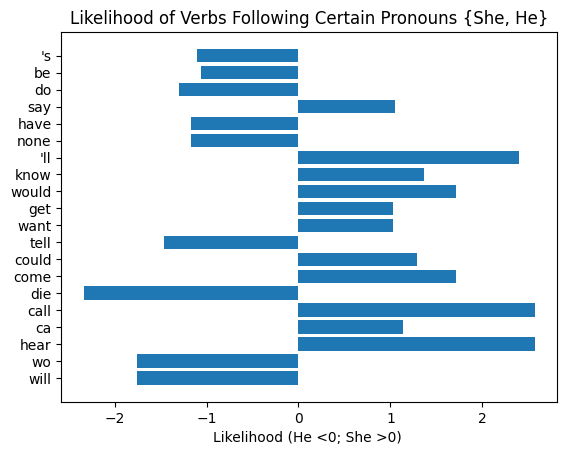

In [77]:
plt.rcdefaults()
fig, ax = plt.subplots()

y_pos = np.arange(len(verbs))
ax.barh(y_pos, freqs, align="center")
ax.set_yticks(y_pos, labels=verbs)
ax.invert_yaxis()  # labels read top-to-bottom
ax.set_xlabel('Likelihood (He <0; She >0) ')
ax.set_title('Likelihood of Verbs Following Certain Pronouns {She, He}')

plt.show()

In [78]:
#TODO: how to calculate likelihood